# Uso de Julia en Ciencia de Datos

In [3]:
using CSV
using HTTP
using DataFrames
using StatsBase
using Plots

## 2016 Olympic Games in Rio de Janeiro Dataset

In [14]:
url = "https://raw.githubusercontent.com/flother/rio2016/master/events.csv"
eventos = CSV.read(HTTP.get(url).body, DataFrame)

,id,sport,discipline,name,sex,venues
,Int64,String,String,String,String,String
1,701492,aquatics,backstroke,Women's 100m Backstroke,female,Olympic Aquatics Stadium
2,305278,aquatics,backstroke,Women's 200m Backstroke,female,Olympic Aquatics Stadium
3,708010,aquatics,backstroke,Men's 100m Backstroke,male,Olympic Aquatics Stadium
4,729643,aquatics,backstroke,Men's 200m Backstroke,male,Olympic Aquatics Stadium
5,567019,aquatics,breaststroke,Women's 100m Breaststroke,female,Olympic Aquatics Stadium
6,607924,aquatics,breaststroke,Women's 200m Breaststroke,female,Olympic Aquatics Stadium
7,519818,aquatics,breaststroke,Men's 100m Breaststroke,male,Olympic Aquatics Stadium
8,778941,aquatics,breaststroke,Men's 200m Breaststroke,male,Olympic Aquatics Stadium
9,795006,aquatics,butterfly,Women's 100m Butterfly,female,Olympic Aquatics Stadium


In [30]:
size(eventos)

(306, 6)

### Visualización de datos

In [35]:
first(eventos, 30)

,id,sport,discipline,name,sex,venues
,Int64,String,String,String,String,String
1,701492,aquatics,backstroke,Women's 100m Backstroke,female,Olympic Aquatics Stadium
2,305278,aquatics,backstroke,Women's 200m Backstroke,female,Olympic Aquatics Stadium
3,708010,aquatics,backstroke,Men's 100m Backstroke,male,Olympic Aquatics Stadium
4,729643,aquatics,backstroke,Men's 200m Backstroke,male,Olympic Aquatics Stadium
5,567019,aquatics,breaststroke,Women's 100m Breaststroke,female,Olympic Aquatics Stadium
6,607924,aquatics,breaststroke,Women's 200m Breaststroke,female,Olympic Aquatics Stadium
7,519818,aquatics,breaststroke,Men's 100m Breaststroke,male,Olympic Aquatics Stadium
8,778941,aquatics,breaststroke,Men's 200m Breaststroke,male,Olympic Aquatics Stadium
9,795006,aquatics,butterfly,Women's 100m Butterfly,female,Olympic Aquatics Stadium


In [36]:
last(eventos,30)

,id,sport,discipline,name,sex,venues
,Int64,String,String,String,String,String
1,797257,weightlifting,weightlifting,Women's 58kg,female,Riocentro - Pavilion 2
2,512287,weightlifting,weightlifting,Women's 63kg,female,Riocentro - Pavilion 2
3,677718,weightlifting,weightlifting,Women's 69kg,female,Riocentro - Pavilion 2
4,417256,weightlifting,weightlifting,Women's 75kg,female,Riocentro - Pavilion 2
5,212799,weightlifting,weightlifting,Men's +105kg,male,Riocentro - Pavilion 2
6,902263,weightlifting,weightlifting,Men's 105kg,male,Riocentro - Pavilion 2
7,182568,weightlifting,weightlifting,Men's 56kg,male,Riocentro - Pavilion 2
8,273149,weightlifting,weightlifting,Men's 62kg,male,Riocentro - Pavilion 2
9,883392,weightlifting,weightlifting,Men's 69kg,male,Riocentro - Pavilion 2


In [60]:
groupby(eventos, :sex)

,id,sport,discipline,name,sex
,Int64,String,String,String,String
1,701492,aquatics,backstroke,Women's 100m Backstroke,female
2,305278,aquatics,backstroke,Women's 200m Backstroke,female
3,567019,aquatics,breaststroke,Women's 100m Breaststroke,female
4,607924,aquatics,breaststroke,Women's 200m Breaststroke,female
5,795006,aquatics,butterfly,Women's 100m Butterfly,female
6,93436,aquatics,butterfly,Women's 200m Butterfly,female
7,772359,aquatics,diving,Women's 10m Platform,female
8,228171,aquatics,diving,Women's 3m Springboard,female
9,305987,aquatics,diving,Women's Synchronised 10m Platform,female


In [38]:
eventos[1:10, [:sport, :discipline]]

,sport,discipline
,String,String
1,aquatics,backstroke
2,aquatics,backstroke
3,aquatics,backstroke
4,aquatics,backstroke
5,aquatics,breaststroke
6,aquatics,breaststroke
7,aquatics,breaststroke
8,aquatics,breaststroke
9,aquatics,butterfly


In [15]:
names(eventos)

6-element Vector{String}:
 "id"
 "sport"
 "discipline"
 "name"
 "sex"
 "venues"

In [28]:
eventos.sport

306-element PooledArrays.PooledVector{String, UInt32, Vector{UInt32}}:
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 "aquatics"
 ⋮
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"
 "wrestling"

In [43]:
unique(eventos.sport)

28-element Vector{String}:
 "aquatics"
 "archery"
 "athletics"
 "badminton"
 "basketball"
 "boxing"
 "canoe"
 "cycling"
 "equestrian"
 "fencing"
 "football"
 "golf"
 "gymnastics"
 ⋮
 "modern pentathlon"
 "rowing"
 "rugby sevens"
 "sailing"
 "shooting"
 "table tennis"
 "taekwondo"
 "tennis"
 "triathlon"
 "volleyball"
 "weightlifting"
 "wrestling"

In [55]:
unique(eventos.discipline)

50-element Vector{String}:
 "backstroke"
 "breaststroke"
 "butterfly"
 "diving"
 "freestyle"
 "marathon swimming"
 "medley"
 "synchronised swimming"
 "water polo"
 "archery"
 "combined"
 "jumps"
 "road"
 ⋮
 "rowing"
 "rugby sevens"
 "sailing"
 "shooting"
 "table tennis"
 "taekwondo"
 "tennis"
 "triathlon"
 "beach volleyball"
 "volleyball"
 "weightlifting"
 "greco roman"

### Análisis de datos

In [31]:
describe(eventos, cols=1:6)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,id,4.95682e5,617,5.20446e5,981370,0
2,sport,,aquatics,,wrestling,0
3,discipline,,archery,,weightlifting,0
4,name,,10m Air Pistol Men,,Women's Épée Team,0
5,sex,,female,,mixed,0
6,venues,,Beach Volleyball Arena,,Whitewater Stadium,0


In [33]:
describe(eventos, cols=1:6, :nmissing)

,variable,nmissing
,Symbol,Int64
1,id,0
2,sport,0
3,discipline,0
4,name,0
5,sex,0
6,venues,0


In [56]:
countmap(eventos.sport)

Dict{String, Int64} with 28 entries:
  "equestrian"        => 6
  "cycling"           => 18
  "football"          => 2
  "gymnastics"        => 18
  "handball"          => 2
  "hockey"            => 2
  "archery"           => 4
  "fencing"           => 10
  "judo"              => 14
  "rugby sevens"      => 2
  "shooting"          => 15
  "tennis"            => 5
  "modern pentathlon" => 2
  "weightlifting"     => 15
  "canoe"             => 16
  "badminton"         => 5
  "aquatics"          => 46
  "athletics"         => 47
  "golf"              => 2
  "rowing"            => 14
  "sailing"           => 10
  "triathlon"         => 2
  "volleyball"        => 4
  "taekwondo"         => 8
  "boxing"            => 13
  ⋮                   => ⋮

In [57]:
countmap(eventos.sex)

Dict{String, Int64} with 3 entries:
  "male"   => 161
  "female" => 136
  "mixed"  => 9

### Gráficas

In [70]:
sx = countmap(eventos.sex)

Dict{String, Int64} with 3 entries:
  "male"   => 161
  "female" => 136
  "mixed"  => 9

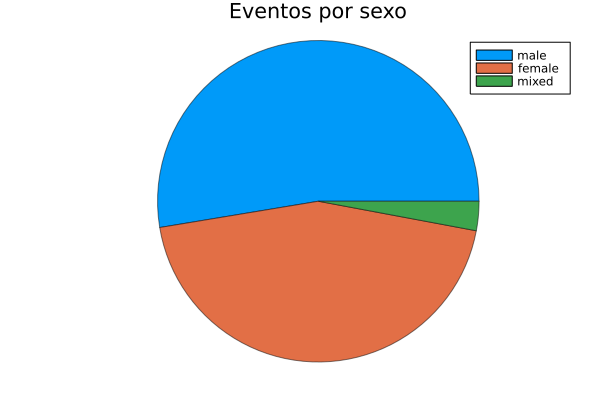

In [121]:
Plots.gr() 
x = collect(keys(sx))
y = collect(values(sx))
pie(x, y, title="Eventos por sexo", l=0.5, shadow=true,)

In [152]:
sprt = countmap(eventos.sport)

Dict{String, Int64} with 28 entries:
  "equestrian"        => 6
  "cycling"           => 18
  "football"          => 2
  "gymnastics"        => 18
  "handball"          => 2
  "hockey"            => 2
  "archery"           => 4
  "fencing"           => 10
  "judo"              => 14
  "rugby sevens"      => 2
  "shooting"          => 15
  "tennis"            => 5
  "modern pentathlon" => 2
  "weightlifting"     => 15
  "canoe"             => 16
  "badminton"         => 5
  "aquatics"          => 46
  "athletics"         => 47
  "golf"              => 2
  "rowing"            => 14
  "sailing"           => 10
  "triathlon"         => 2
  "volleyball"        => 4
  "taekwondo"         => 8
  "boxing"            => 13
  ⋮                   => ⋮

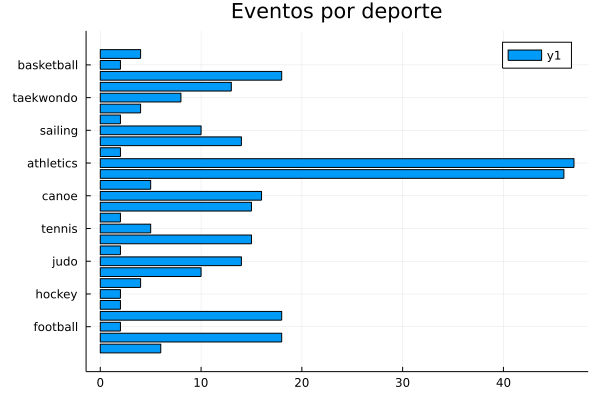

In [153]:
x = collect(keys(sprt))
y = collect(values(sprt))
bar(x, y, title="Eventos por deporte", orientation=:h, shadow=true)